In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

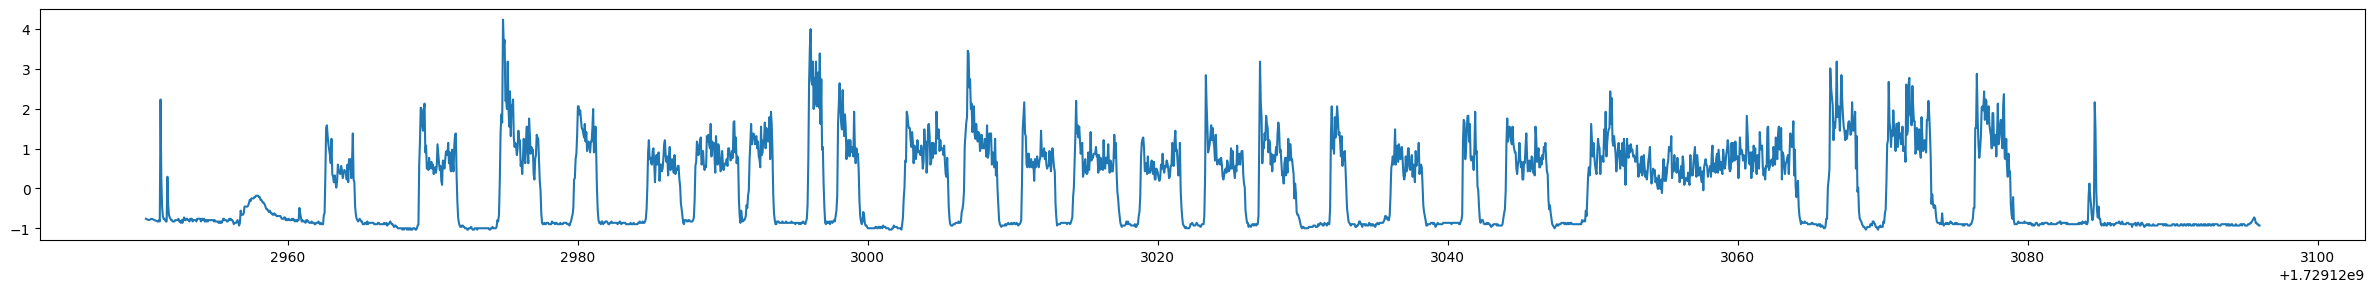

In [2]:
### Load Data
data = np.genfromtxt("lk_pressed.csv", delimiter=',')
Y = data[:,1]
X = data[:, 0]

### Normalize Data
Y = np.reshape(Y, (len(Y), 1))   # Need to reshape it to scale
scaler = StandardScaler()
scaler.fit(Y)
Y = scaler.transform(Y)

### Clean up data
running_list = []
running_list_y = []
final_x = []
final_y = []
prev = 0
total = 0
for x, y in zip(X, Y):
    # if the times are the same, then we append the vals to a running list
    if x == prev:
        running_list.append(x)
        running_list_y.append(y[0])

    # if the times are different, then we can break up the 
    # millisecond based on how many sensor readings we got
    else:
        for index, i in enumerate(running_list):
            final_x.append(min(running_list) + (index + 1) / len(running_list))
            final_y.append(running_list_y[index])
        running_list = []
        running_list_y = []
    prev = x

### Plot Data
plt.figure(figsize=(30, 3))
plt.plot(final_x, final_y)
plt.show()


In [3]:
### Create a Pandas DataFrame
orignal = pd.DataFrame({"Time": final_x[1:], "Signal": final_y[1:]})

df = orignal[orignal["Time"] > 1729122960].copy()
df["Time"] = df["Time"] - min(df["Time"])
display(df.head())
print(len(df))

,Time,Signal
174,0.000000,-0.757928
175,0.052632,-0.791835
176,0.105263,-0.791835
177,0.157895,-0.791835
178,0.210526,-0.757928


2572


In [4]:
interval_times = [2.34, 2.14, 4.24, 2.72, 2.94, 2.81,
                  2.39, 1.71, 3.36, 2.39, 0.93, 2.89,
                  0.73, 1.54, 2.37, 1.14, 0.79, 1.59,
                  3.06, 3.11, 1.09, 2.29, 1.59, 2.28,
                  1.31, 3.02, 1.48, 2.84, 1.66, 2.86,
                  0.93, 2.56, 2.36, 1.18, 2.94, 2.29,
                  2.67, 1.41, 1.48, 3.11, 2.92, 14.24,
                  2.23, 1.96, 2.08, 3.12, 2.87, 2.31,
                  2.29]

        Mean       Max       Min     Range State
0  -0.682579  1.581657 -0.893556  2.475213     0
1   0.393172  1.378215 -0.791835  2.170050     1
2  -0.901510  0.598353 -1.029184  1.627537     0
3   0.746370  2.124169 -0.859649  2.983818     1
4  -0.862115  1.852913 -1.029184  2.882097     0
5   1.288649  4.226405 -0.859649  5.086054     1
6  -0.735323  0.869609 -0.927463  1.797072     0
7   0.950781  2.056355 -0.893556  2.949911     1
8  -0.734087  1.208680 -0.893556  2.102236     0
9   0.449625  1.208680 -0.893556  2.102236     1
10 -0.315253  1.174772 -0.825742  2.000514     0
11  0.806111  1.683378 -0.859649  2.543027     1
12 -0.338002  1.140865 -0.825742  1.966607     0
13  1.172512  1.920727 -0.147601  2.068329     1
14 -0.839305 -0.418858 -0.893556  0.474698     0
15  2.337299  3.989056  0.123655  3.865401     1
16 -0.807658 -0.452765 -0.893556  0.440791     0
17  1.208680  2.632775 -0.554486  3.187260     1
18 -0.939155 -0.317137 -1.029184  0.712048     0
19  0.984548  1.9207

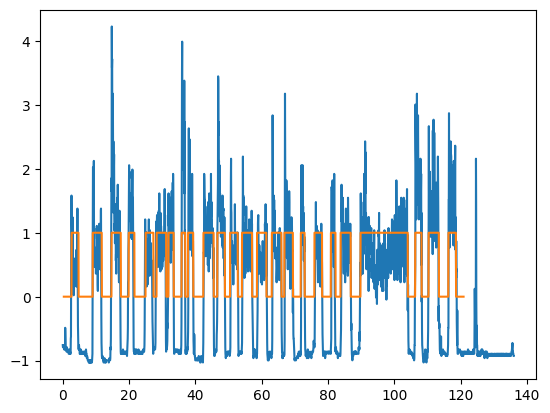

In [5]:
### Sliding intervals

"""

intervals = []
for i in range(len(df)):
    intervals.append(df[i: i + 5].copy())

for i in range(10):
    plt.plot(intervals[i]["Time"], intervals[i]["Signal"])
    plt.show()
    
"""

df_counter = 0

intervals = []

start_time = 0.3

frame_df = pd.DataFrame(columns = ["Mean", "Max", "Min", "Range", "State"])


for i in range(len(interval_times)):
    
    end_time = start_time + interval_times[i]
    
#     pd.DataFrame({"Time": final_x[1:], "Signal": final_y[1:]})
    
#     while(df[df_counter]["Time"] < end_time):
#         df_counter += 1
        
#     cur_df = pd.DataFrame({"Time": final_x[1:], "Signal": final_y[1:]})    

    cur_interval = df[df["Time"].between(start_time,end_time)]
    
    intervals.append(df[df["Time"].between(start_time,end_time)])
    
    df.loc[df["Time"].between(start_time, end_time), "State"] = i%2
            
    start_time = end_time
    
    #print(cur_interval)
    
    mean = cur_interval[ "Signal" ].mean()
    max_val = cur_interval[ "Signal" ].max() 
    min_val = cur_interval[ "Signal" ].min() 
    range_val = max_val - min_val
    
    #print(mean)
    
    temp_frame = pd.DataFrame([{"Mean":mean, "Max":max_val, "Min":min_val, "Range":range_val,"State":i%2}])
    
    frame_df = pd.concat([frame_df, temp_frame], ignore_index=True)
    

# for i in range(len(intervals)):
#     plt.plot(intervals[i]["Time"], intervals[i]["Signal"])
#     plt.show()
    
plt.plot(df["Time"], df["Signal"])
plt.plot(df["Time"], df["State"])
#print(df)

print(frame_df)

plt.show()

In [7]:
df.to_csv("with_states.csv")

In [6]:
#Analysis


# Features and target
X = frame_df[["Mean", "Max", "Min", "Range"]]  # Features
y = frame_df["State"]  # Target
y = y.astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42, max_features='sqrt')
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(importance)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Confusion Matrix:
[[12  0]
 [ 0 13]]

Feature Importance:
  Feature  Importance
0    Mean    0.488839
1     Max    0.248938
3   Range    0.207739
2     Min    0.054484


In [7]:
from sklearn.tree import export_text

# Assuming your RandomForest model is already trained
# Extract the first decision tree from the Random Forest
tree = model.estimators_[0]

# Get the decision rules for the tree
tree_rules = export_text(tree, feature_names=X.columns.tolist())

# Print the decision rules (splits and thresholds used in the first tree)
print(tree_rules)

|--- Max <= 1.12
|   |--- class: 0.0
|--- Max >  1.12
|   |--- class: 1.0



In [10]:
slice_length = 5

short_slides_df = pd.DataFrame(columns = ["Mean", "Max", "Min", "Range", "State"])

# We want to start @ slice 8 and go up by 5


for i in range(0, len(df) - slice_length + 1):
    current_frame = cur_interval = df.iloc[i: i + slice_length - 1]
    
    #plt.figure(figsize = (6,4))
    
    mean = current_frame[ "Signal" ].mean()
    max_val = current_frame[ "Signal" ].max() 
    min_val = current_frame[ "Signal" ].min() 
    range_val = max_val - min_val
    
    temp_frame = pd.DataFrame([{"Mean":mean, "Max":max_val, "Min":min_val, "Range":range_val, "State":cur_interval.iloc[-1]["State"]}])
    # Change to adding rows at the end
    short_slides_df = pd.concat([short_slides_df, temp_frame], ignore_index=True)
    
    
#     plt.plot(current_frame["Time"], current_frame["Signal"])
#     plt.plot(current_frame["Time"], current_frame["State"])
    
#     plt.axhline(mean, color='red', linestyle='--', label=f"Mean = {mean:.2f}")
#     plt.text((start_window + end_window)/2, mean,  # Position at middle x, mean y
#               f"Mean = {mean:.2f}", color='blue', fontsize=10, ha='center')
    
#     plt.text((start_window + end_window)/2, max_val,  # Position at middle x, mean y
#               f"Max = {max_val:.2f}", color='blue', fontsize=10, ha='center')
    
#     plt.text((start_window + end_window)/2, min_val,  # Position at middle x, mean y
#               f"Min = {min_val:.2f}", color='blue', fontsize=10, ha='center')
    
#     plt.text((start_window + end_window)/2, (min_val+max_val) / 2,  # Position at middle x, mean y
#               f"Range = {range_val:.2f}", color='blue', fontsize=10, ha='center')
    
#     end = start + interval_size
#     plt.figure(figsize=(6, 4))  # Create a new figure
#     plt.plot(x[start:end], y[start:end], label=f"Interval {i + 1}")
#     plt.title(f"Plot for Interval {i + 1}")
#     plt.xlabel("X")
#     plt.ylabel("Y")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

print (short_slides_df)

          Mean       Max       Min     Range  State
0    -0.783358 -0.757928 -0.791835  0.033907    NaN
1    -0.783358 -0.757928 -0.791835  0.033907    NaN
2    -0.783358 -0.757928 -0.791835  0.033907    NaN
3    -0.774881 -0.757928 -0.791835  0.033907    0.0
4    -0.774881 -0.757928 -0.791835  0.033907    0.0
...        ...       ...       ...       ...    ...
2563 -0.774881 -0.724021 -0.859649  0.135628    NaN
2564 -0.800312 -0.724021 -0.859649  0.135628    NaN
2565 -0.842695 -0.757928 -0.893556  0.135628    NaN
2566 -0.876603 -0.859649 -0.893556  0.033907    NaN
2567 -0.893556 -0.859649 -0.927463  0.067814    NaN

[2568 rows x 5 columns]


In [11]:
#Analysis

short_slides_df = short_slides_df[short_slides_df["State"].apply(lambda x: not (pd.isna(x) or x in [float('inf'), float('-inf')]))]

print(short_slides_df.info())
print(short_slides_df.head())

# Features and target
X = short_slides_df[["Mean", "Max", "Min", "Range"]]  # Features
y = short_slides_df["State"]  # Target
y = y.astype(int)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42, max_features='sqrt',max_depth=4)
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(importance)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 3 to 2282
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mean    2280 non-null   float64
 1   Max     2280 non-null   float64
 2   Min     2280 non-null   float64
 3   Range   2280 non-null   float64
 4   State   2280 non-null   float64
dtypes: float64(5)
memory usage: 106.9 KB
None
       Mean       Max       Min     Range  State
3 -0.774881 -0.757928 -0.791835  0.033907    0.0
4 -0.774881 -0.757928 -0.791835  0.033907    0.0
5 -0.791835 -0.757928 -0.825742  0.067814    0.0
6 -0.791835 -0.757928 -0.825742  0.067814    0.0
7 -0.800312 -0.791835 -0.825742  0.033907    0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       301
           1       0.98      0.95      0.96       383

    accuracy                           0.96       684
   macro avg       0.96      0.96      0.96       684

In [12]:
# Assuming your RandomForest model is already trained
# Extract the first decision tree from the Random Forest
tree = model.estimators_[0]

# Get the decision rules for the tree
tree_rules = export_text(tree, feature_names=X.columns.tolist())

# Print the decision rules (splits and thresholds used in the first tree)
print(tree_rules)

|--- Max <= 0.21
|   |--- Range <= 0.70
|   |   |--- Mean <= -0.77
|   |   |   |--- Range <= 0.05
|   |   |   |   |--- class: 0.0
|   |   |   |--- Range >  0.05
|   |   |   |   |--- class: 0.0
|   |   |--- Mean >  -0.77
|   |   |   |--- Max <= -0.64
|   |   |   |   |--- class: 1.0
|   |   |   |--- Max >  -0.64
|   |   |   |   |--- class: 0.0
|   |--- Range >  0.70
|   |   |--- Min <= -0.74
|   |   |   |--- Mean <= -0.55
|   |   |   |   |--- class: 1.0
|   |   |   |--- Mean >  -0.55
|   |   |   |   |--- class: 0.0
|   |   |--- Min >  -0.74
|   |   |   |--- class: 0.0
|--- Max >  0.21
|   |--- Mean <= 0.25
|   |   |--- Max <= 0.39
|   |   |   |--- Mean <= -0.06
|   |   |   |   |--- class: 1.0
|   |   |   |--- Mean >  -0.06
|   |   |   |   |--- class: 1.0
|   |   |--- Max >  0.39
|   |   |   |--- Range <= 1.98
|   |   |   |   |--- class: 0.0
|   |   |   |--- Range >  1.98
|   |   |   |   |--- class: 1.0
|   |--- Mean >  0.25
|   |   |--- Range <= 2.17
|   |   |   |--- Min <= 0.45
|   |   